<a href="https://colab.research.google.com/github/mohammedfaizan3103/ML-pracitice/blob/main/Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **WEEK-7 Clustering**

Implement K means algorithm ( also use elbow method)

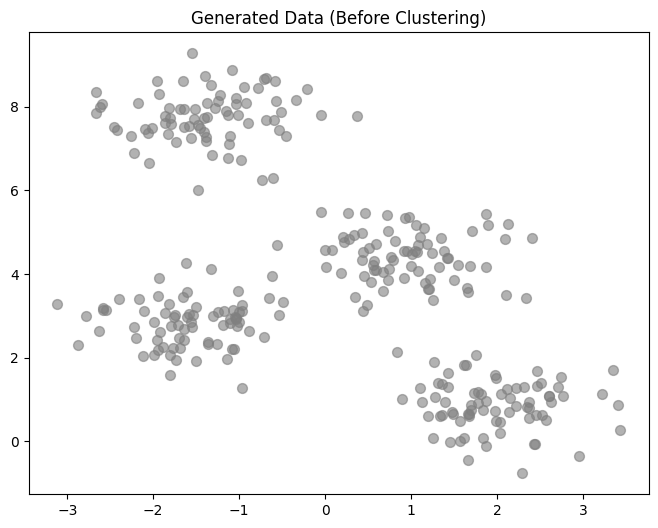

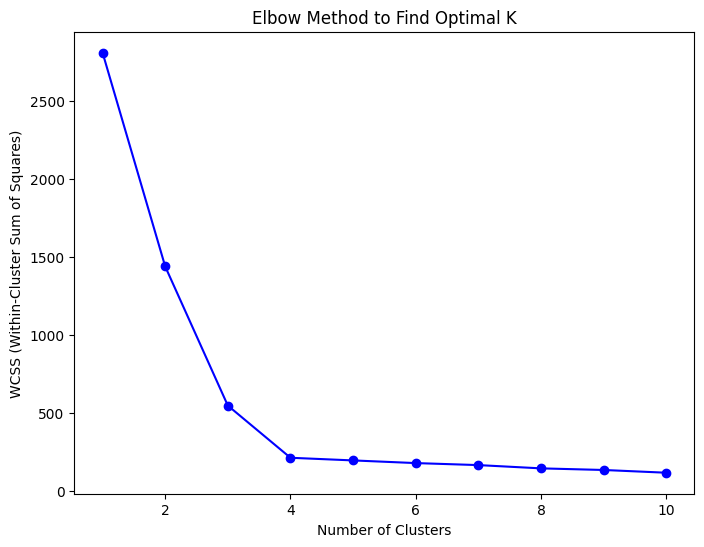

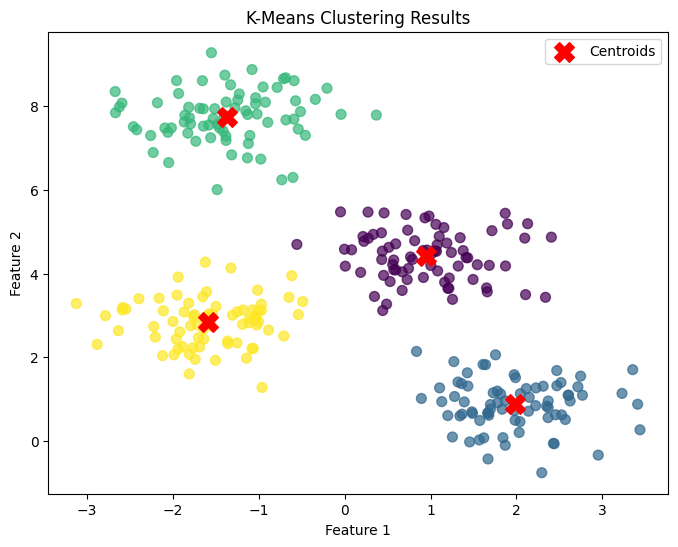

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#Generating sample data
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)

#Plot the generated data before clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], s=50, alpha=0.6, color='gray')
plt.title('Generated Data (Before Clustering)')
plt.show()

#Elbow Method to determine optimal number of clusters
wcss = []
for k in range(1, 11):  #Checking k values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ gives the sum of squared distances

#Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='blue')
plt.title('Elbow Method to Find Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

#Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=0)  #Using 4 as we already know from data generation
kmeans.fit(X)

#Predict the cluster labels
y_pred = kmeans.predict(X)

#Plot the resulting clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Implement all the clustering distance measures (similarity measures)

I. Euclidean distance
ii. Manhattan distance
iii. cosine similarity
iv. minkowski
v. jaccard index

In [14]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import Binarizer
from scipy.spatial.distance import minkowski

#Generate synthetic 2D data using make_blobs
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

#Select two example points from the dataset
point1 = X[0]
point2 = X[1]

print("Point 1:", point1)
print("Point 2:", point2)

#Euclidean Distance
euclidean = euclidean_distances([point1], [point2])[0][0]
print(f"Euclidean Distance: {euclidean:.4f}")

#Manhattan Distance
manhattan = manhattan_distances([point1], [point2])[0][0]
print(f"Manhattan Distance: {manhattan:.4f}")

#Cosine Similarity
cosine_sim = cosine_similarity([point1], [point2])[0][0]
print(f"Cosine Similarity: {cosine_sim:.4f}")

# Minkowski Distance (p=3)
minkowski_dist = minkowski(point1, point2, p=3)
print(f"Minkowski Distance (p=3): {minkowski_dist:.4f}")

# Step 7: Jaccard Similarity (on binarized vectors)
# Binarizing the points (e.g., presence or absence of features)
binarizer = Binarizer(threshold=0.0)  # convert all values > 0 to 1
point1_bin = binarizer.fit_transform([point1])[0]
point2_bin = binarizer.transform([point2])[0]

# Ensure binary format for Jaccard
jaccard = jaccard_score(point1_bin, point2_bin)
print(f"Jaccard Similarity: {jaccard:.4f}")


Point 1: [-7.72642091 -8.39495682]
Point 2: [5.45339605 0.74230537]
Euclidean Distance: 16.0374
Manhattan Distance: 22.3171
Cosine Similarity: -0.7703
Minkowski Distance (p=3): 14.5058
Jaccard Similarity: 0.0000


Implement Hierarchial clustering - agglomerative

[2 0 0 0 1 1 2 0 2 1 1 2 2 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 2 1 1 0 0 0 2 0
 2 0 0 1 0 1 1 0 2 2 1 2 0 0 0 0 2 0 0 1 1 0 2 0 2 1 0 0 1 2 0 0 0 0 0 0 1
 2 1 2 0 1 0 0 2 1 0 0 0 0 0 2 0 1 0 2 2 2 0 0 2 1 0 0 0 0 1 0 2 0 1 1 0 2
 1 0 0 0 0 0 0 0 0 0 1 2 0 0 2 0 2 2 0 1 1 0 0 0 2 1 1 0 1 2 0 0 2 2 0 2 0
 1 1 0 0 2 0 1 0 0 2 2 2 0 2 2 0 0 1 2 2 1 2 0 0 1 1 2 1 2 0 0 1 0 1 0 0 0
 0 2 2 2 0 0 1 0 0 0 0 2 0 1 2]


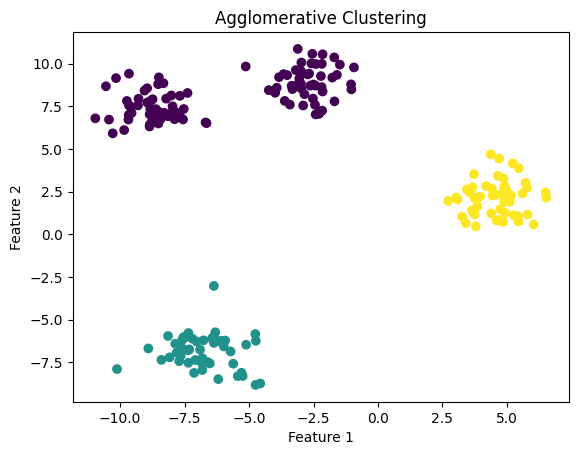

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, _= make_blobs(n_samples = 200, centers = 4, random_state = 42)

#agglomerative clustering
aggl = AgglomerativeClustering(n_clusters = 3)
#fitting the model
aggl.fit(X)
#labels
labels = aggl.labels_
print(labels)


plt.scatter(X[:, 0], X[:, 1], c = labels, cmap = 'viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

                          status_id status_type status_published  \
0  246675545449582_1649696485147474       video   4/22/2018 6:00   
1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
2  246675545449582_1648730588577397       video   4/21/2018 6:17   
3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
4  246675545449582_1645700502213739       photo   4/18/2018 3:22   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  Column1  Column2  Column3  Column4  \
0          1         1           0      NaN     

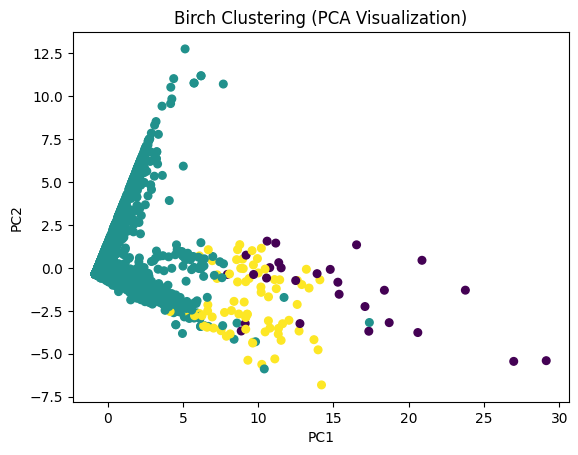

In [19]:
#Birch hierarchial clustering
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch
from sklearn.decomposition import PCA

df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/Live.csv")

X = df.select_dtypes(include=['float64', 'int64'])
X = X.dropna(axis = 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

birch = Birch(n_clusters=3)
clusters_birch = birch.fit_predict(X_scaled)

df['Birch_Cluster'] = clusters_birch
print(df.head())

#PCA for visualization - reduce the data into 2d to visualizae
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_birch, cmap='viridis', s=30)
plt.title('Birch Clustering (PCA Visualization)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



In [20]:
# After fitting Birch and creating labels on X_scaled
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 1) PCA variance captured by the plot
pca = PCA(n_components=2)
_ = pca.fit_transform(X_scaled)
print("Explained variance (PC1+PC2):", pca.explained_variance_ratio_.sum())

# 2) Silhouette (use the same features used to fit Birch)
print("Silhouette score:", silhouette_score(X_scaled, labels))

Explained variance (PC1+PC2): 0.5761642384237827
Silhouette score: 0.8324135243554555


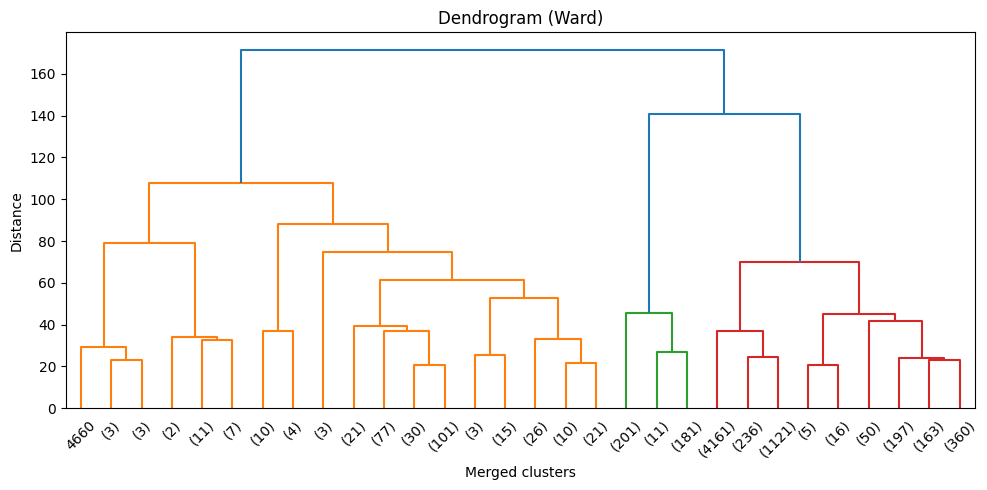

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Load numeric features
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/Live.csv")
X = df.select_dtypes(include=["float64", "int64"]).fillna(0.0).values
X = StandardScaler().fit_transform(X)

# Hierarchical clustering + dendrogram
Z = linkage(X, method="ward")
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="lastp", p=30)  # show last 30 merges for readability
plt.title("Dendrogram (Ward)")
plt.xlabel("Merged clusters")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_agglomerative.py:325: UserWarning: the number of connected components of the connectivity matrix is 12 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


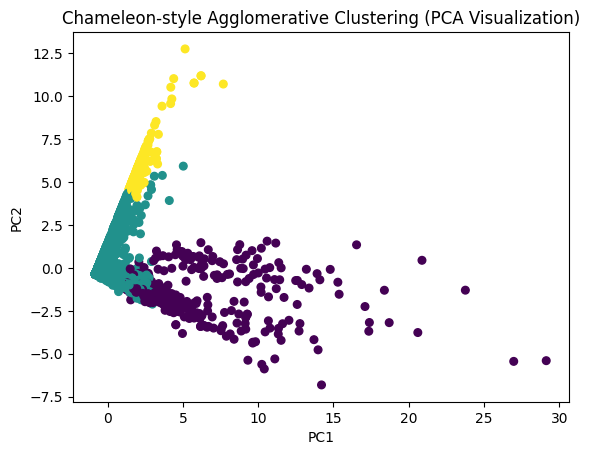

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/Live.csv")

# Select numeric columns
X = df.select_dtypes(include=['float64', 'int64'])
X = X.dropna(axis = 1)
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build KNN graph for local connectivity
connectivity = kneighbors_graph(X_scaled, n_neighbors=10, include_self=False)

# Apply Chameleon-style clustering
chameleon = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward',
    connectivity=connectivity
)
clusters_chameleon = chameleon.fit_predict(X_scaled)

# Add labels
df['Chameleon_Cluster'] = clusters_chameleon
# print(df.head())

# PCA visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_chameleon, cmap='viridis', s=30)
plt.title('Chameleon-style Agglomerative Clustering (PCA Visualization)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


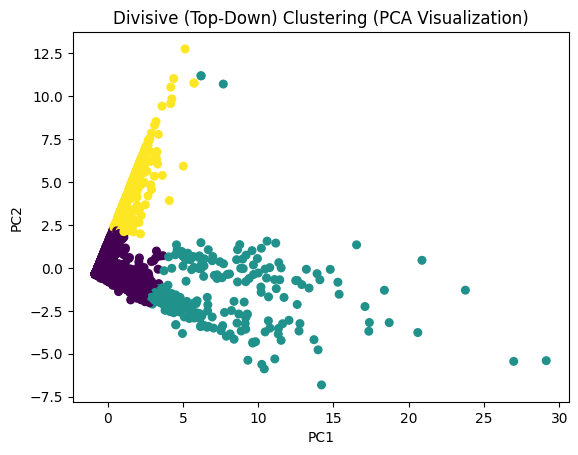

In [23]:
#Divisive Hierarchial chlustering

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/Live.csv")

# Select numeric columns
X = df.select_dtypes(include=['float64', 'int64'])
X = X.dropna(axis = 1)

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def divisive_clustering(X, max_clusters=3):
    clusters = {0: X}
    labels = np.zeros(X.shape[0], dtype=int)
    current_cluster = 0

    while len(clusters) < max_clusters:
        # Find the largest cluster to split
        largest_cluster = max(clusters.keys(), key=lambda k: len(clusters[k]))
        data_to_split = clusters[largest_cluster]

        if len(data_to_split) <= 2:
            break  # stop if too small to split

        # Split the largest cluster using KMeans (2 subclusters)
        kmeans = KMeans(n_clusters=2, random_state=42)
        sub_labels = kmeans.fit_predict(data_to_split)

        # Assign new cluster IDs
        new_cluster_id = max(clusters.keys()) + 1
        clusters[new_cluster_id] = data_to_split[sub_labels == 1]
        clusters[largest_cluster] = data_to_split[sub_labels == 0]

        # Update overall labels
        mask = (labels == largest_cluster)
        labels[mask] = np.where(sub_labels == 0, largest_cluster, new_cluster_id)

    return labels

# Apply Divisive clustering
clusters_divisive = divisive_clustering(X_scaled, max_clusters=3)

# Add cluster labels
df['Divisive_Cluster'] = clusters_divisive
# print(df.head())

# PCA visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_divisive, cmap='viridis', s=30)
plt.title('Divisive (Top-Down) Clustering (PCA Visualization)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


Implement DBSCAN clustering

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
#making synthetic data
X, y_true = make_blobs(n_samples=300, random_state=42, centers=3, cluster_std=0.6)

#scaling
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

#making DBSCAN model
dbs = DBSCAN(eps=0.3, min_samples=7)
labels = dbs.fit_predict(X_transformed)
print(labels)

#visualization part - one way of doing it
# colors = ['k' if label == -1 else plt.cm.tab10(label % 10) for label in labels]
# plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=colors)
# plt.title('DBSCAN Clustering')
# plt.xlabel('Feature 1 (scaled)')
# plt.ylabel('Feature 2 (scaled)')
# plt.show()

#printing cluster information
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")


[0 0 1 2 0 2 1 2 1 1 1 2 1 1 0 1 0 2 1 1 1 1 2 0 1 0 0 2 2 1 1 1 0 1 0 1 0
 2 0 2 2 1 0 2 1 1 0 2 0 2 2 0 0 1 0 2 0 1 2 1 0 2 2 0 0 2 2 0 0 1 2 0 0 1
 1 0 0 2 1 2 1 1 0 1 2 0 0 1 2 1 0 1 0 1 1 0 0 1 0 0 2 1 2 1 1 1 1 1 2 0 2
 1 1 1 1 2 0 2 0 2 2 2 1 0 0 0 0 1 0 0 1 1 1 1 1 2 2 0 1 0 1 1 0 1 2 2 2 1
 2 1 1 0 2 0 1 2 2 0 0 1 1 0 0 0 1 0 2 1 1 1 1 1 2 1 2 2 2 1 2 2 0 1 0 2 2
 0 2 1 2 2 0 0 2 0 2 2 2 2 1 0 1 1 2 2 1 2 0 0 2 1 1 0 2 2 0 0 0 0 1 0 0 2
 0 0 1 2 0 0 2 1 1 0 1 0 2 2 0 2 0 0 0 2 2 1 0 2 2 2 0 2 0 2 0 2 2 0 2 1 0
 1 1 1 0 1 2 2 0 2 2 1 1 2 2 2 0 0 0 1 1 1 2 2 2 2 0 2 0 2 2 0 1 2 2 1 0 1
 2 1 0 0]
Estimated number of clusters: 3
Estimated number of noise points: 0


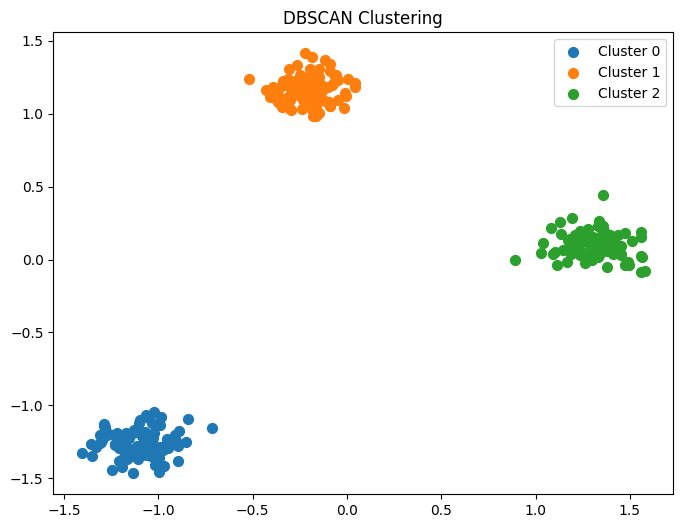

In [25]:
plt.figure(figsize=(8, 6))

for label in set(labels):
    color = 'k' if label == -1 else None
    plt.scatter(X_transformed[labels == label, 0],
                X_transformed[labels == label, 1],
                c=color,
                label=f'Noise' if label == -1 else f'Cluster {label}',
                s=50)

plt.title('DBSCAN Clustering')
# plt.xlabel('Scaled Feature 1')
# plt.ylabel('Scaled Feature 2')
plt.legend()
plt.show()


Spectral clustering

[1 1 0 2 1 2 0 2 0 0 0 2 0 0 1 0 1 2 0 0 0 0 2 1 0 1 1 2 2 0 0 0 1 0 1 0 1
 2 1 2 2 0 1 2 0 0 1 2 1 2 2 1 1 0 1 2 1 0 2 0 1 2 2 1 1 2 2 1 1 0 2 1 1 0
 0 1 1 2 0 2 0 0 1 0 2 1 1 0 2 0 1 0 1 0 0 1 1 0 1 1 2 0 2 0 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 1 2 2 2 0 1 1 1 1 0 1 1 0 0 0 0 0 2 2 1 0 1 0 0 1 0 2 2 2 0
 2 0 0 1 2 1 0 2 2 1 1 0 0 1 1 1 0 1 2 0 0 0 0 0 2 0 2 2 2 0 2 2 1 0 1 2 2
 1 2 0 2 2 1 1 2 1 2 2 2 2 0 1 0 0 2 2 0 2 1 1 2 0 0 1 2 2 1 1 1 1 0 1 1 2
 1 1 0 2 1 1 2 0 0 1 0 1 2 2 1 2 1 1 1 2 2 0 1 2 2 2 1 2 1 2 1 2 2 1 2 0 1
 0 0 0 1 0 2 2 1 2 2 0 0 2 2 2 1 1 1 0 0 0 2 2 2 2 1 2 1 2 2 1 0 2 2 0 1 0
 2 0 1 1]


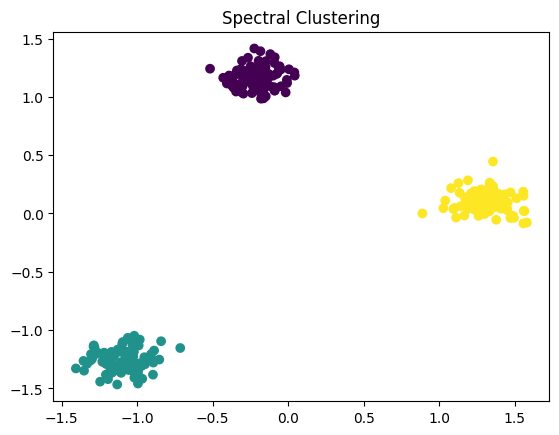

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering

X, y_true = make_blobs(n_samples = 300, centers = 3, cluster_std = 0.6, random_state = 42)

#scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#clustering using spectral
sc = SpectralClustering(n_clusters = 3)
clusters = sc.fit_predict(X_scaled)
print(clusters)

#visualization
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = clusters)
plt.title('Spectral Clustering')
plt.show()

In [ ]:
#clusters_birch